In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Loading Packages
We are loading the necessary packages for our code.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the data

In [3]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

### Checking the data

To know more about our dataset, we are running few lines of code to check the dimensions of our dataset, data types of the variables and basic infomation about the variables.


In [4]:
train.shape

(891, 12)

We have 891 observations with 12 features.

In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* From the min and max of age column, we can observe the passengers age ranges from 4 months to 80 years . Also 75% of the passengers were less than 38 years old.

* Looking at the Fare column, we can spot that there some passengers were allowed to travel for free.


## Data Preprocessing

### Null value check


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Since Cabin has null values in majority, we will drop it.

In [9]:
train.drop(['Cabin'], axis = 1, inplace = True)


## Understanding the data 

Let's first check how many passengers survived.

In [10]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Out of 891 passengers, only 342 passengers survived. Now let's look into the survival percentage.

In [11]:
train['Survived'].value_counts()/train.shape[0]

0    0.616162
1    0.383838
Name: Survived, dtype: float64

only 38.38% of passengers survived. The rest 61.61% did not.

**Analysing Pclass feature**


First, we will analyse the 'Pclass' feature.

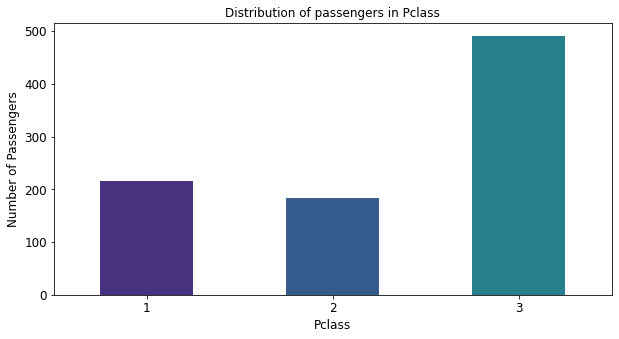

In [12]:
color = sns.color_palette('viridis')
pclass_survived=train.groupby('Pclass')['Survived'].count()
plt.subplots(figsize=(10,5))
pclass_survived.plot(kind='bar', fontsize=12, color=color)
plt.xticks(rotation=0)
plt.xlabel('Pclass', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.title('Distribution of passengers in Pclass', fontsize=12)
plt.show()

In [13]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [14]:
train.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

The fare for Pclass 1 is high compared to the other classes.
Pclass 3 has the least fare. So there are more number of passengers in Pclass 3.

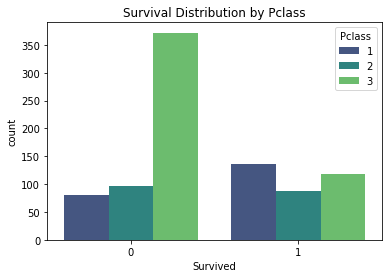

In [15]:

sns.countplot(x='Survived',hue='Pclass',data=train,palette='viridis').set(title='Survival Distribution by Pclass')
plt.show()

The survival rate of passengers in Pclass 1 is more as they are the rich ones, who had paid more fare.

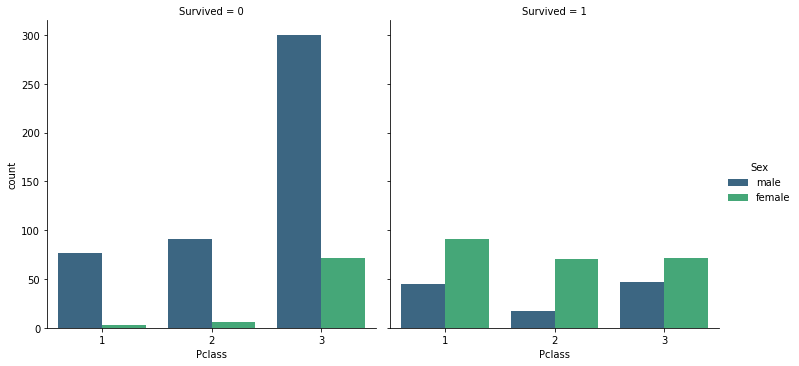

In [16]:
g = sns.catplot(x="Pclass", hue="Sex", col="Survived",
                data=train, palette='viridis',kind="count");

* We can visualize that, survival rate of women is more than men in all the classes.

* Passengers from Pclass '1' survived more than any other class.

* Also lot of passengers from Pclass '3' didn't survive.

**Analysing Embarked feature**


In [17]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

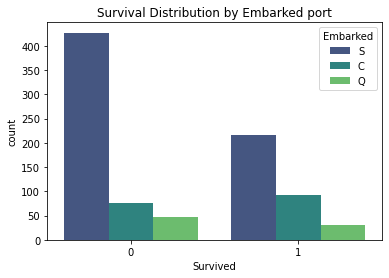

In [18]:
sns.countplot(x='Survived',hue='Embarked',data=train,palette='viridis').set(title='Survival Distribution by Embarked port')
plt.show()

* Lot of passengers from 'S' Embarked did not survive.

* Only few passengers have Embarked from 'Q'.

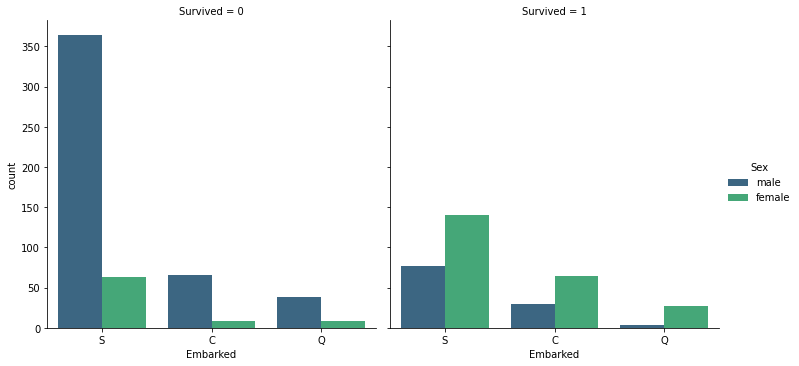

In [19]:
g = sns.catplot(x="Embarked", hue="Sex", col="Survived",
                data=train, palette='viridis',kind="count");

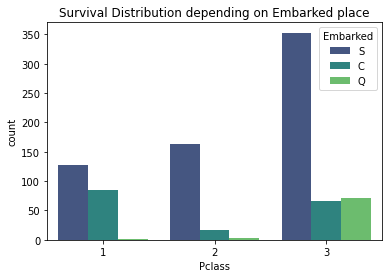

In [20]:
sns.countplot(x='Pclass',hue='Embarked',data=train,palette='viridis').set(title='Survival Distribution depending on Embarked place')
plt.show()

Pclass '1' passengers have not Embarked much in 'Q'. So let's check the fares for the Embarked ports.

In [21]:
train.groupby('Embarked')['Fare'].mean()

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

Since 'Q' port has low mean fare, not much Pclass '1' passengers have boarded from that port.

**Analysing Parch and SipSp feature**

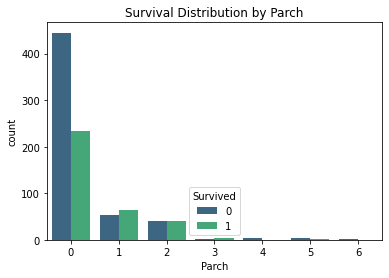

In [22]:
sns.countplot(x='Parch',hue='Survived',data=train,palette='viridis').set(title='Survival Distribution by Parch')
plt.show()

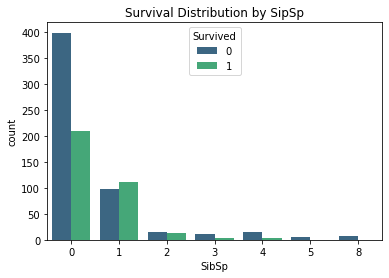

In [23]:
sns.countplot(x='SibSp',hue='Survived',data=train,palette='viridis').set(title='Survival Distribution by SipSp')
plt.show()

The survival of passengers depended on the size of the family. The bigger the family, they were less likely to survive.

## **Corelation Check**

<AxesSubplot:>

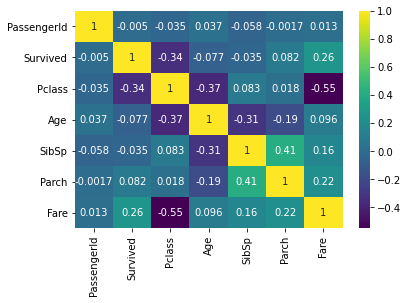

In [24]:
corrDf = train.corr()
sns.heatmap(corrDf, 
        xticklabels=corrDf.columns,
        yticklabels=corrDf.columns,annot=True, cmap='viridis')

## Test set preparation

In [25]:
test.shape

(418, 11)

In [26]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [27]:
train.shape

(891, 11)

For easy handling, we will concatenate both the train and the test data. 

To differentiate between the train and the test data, we will include Source column.
After preprocessing is done, we will be dropping it.

In [28]:
# Create Source Column in both Train and Test
train['Source'] = "Train"
test['Source'] = "Test"

# Combine Train and Test
FullRaw = pd.concat([train, test], axis = 0)
FullRaw.shape


(1309, 13)

In [29]:
FullRaw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Source,Cabin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Train,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Train,NaN
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Train,NaN
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Train,NaN
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Train,NaN


In [30]:
# Removing PassengerId,Cabin,Name and Ticket columns
FullRaw.drop(['PassengerId'], axis = 1, inplace = True)
FullRaw.drop(['Cabin'], axis = 1, inplace = True)

FullRaw.drop(['Name'], axis = 1, inplace = True)
FullRaw.drop(['Ticket'], axis = 1, inplace = True)


In [31]:
FullRaw.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
Source        0
dtype: int64

### **Imputing missing values**

In [32]:
# We will impute the missing values for Age,Fare and Embarked 

tempMedian=FullRaw['Age'].median()
FullRaw['Age']= FullRaw['Age'].fillna(tempMedian)


tempMedian=FullRaw['Fare'].median()
FullRaw['Fare']= FullRaw['Fare'].fillna(tempMedian)

tempMode=FullRaw['Embarked'].mode()[0]
FullRaw['Embarked']= FullRaw['Embarked'].fillna(tempMode)


FullRaw.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Source        0
dtype: int64

### One hot encoding



We are going to create dummy variables to include the categorical data for modelling. 

In [33]:
FullRaw2= pd.get_dummies(FullRaw,drop_first= True)
FullRaw2.shape

(1309, 10)

In [34]:
# Checking our dummy variables
FullRaw2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Source_Train
0,0.0,3,22.0,1,0,7.2500,1,0,1,1
1,1.0,1,38.0,1,0,71.2833,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,0,0,1,1
3,1.0,1,35.0,1,0,53.1000,0,0,1,1
4,0.0,3,35.0,0,0,8.0500,1,0,1,1


In [35]:
# We are separating the train and the test data, and dropping the Source column as all our preprecessing work is done.
Train2 = FullRaw2[FullRaw2['Source_Train'] == 1].drop(['Source_Train'], axis = 1).copy()
FinalTest = FullRaw2[FullRaw2['Source_Train'] == 0].drop(['Source_Train'], axis = 1).copy()

print(Train2.shape)
FinalTest.shape

(891, 9)


(418, 9)

### **Splitting the data**

In [36]:
from sklearn.model_selection import train_test_split
Train, Test = train_test_split(Train2, train_size=0.8, random_state = 150)


X_train = Train.drop(['Survived'], axis = 1).copy()
y_train = Train['Survived'].copy()
X_test = Test.drop(['Survived'], axis = 1).copy()
y_test = Test['Survived'].copy()
FinalTest_X = FinalTest.drop(['Survived'], axis = 1).copy()
FinalTest_Y = FinalTest['Survived'].copy()

### **Scaling the features**

In [37]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [38]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
FinalTest_X=scaler.transform(FinalTest_X)

### **Building the model**

We are going to build a simple ensemble model on Logistic Regression, KNN and Random Forest. Predictions are done based on majority voting.

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import statistics

model1 = RandomForestClassifier()
model2 = LogisticRegression()
model3 = XGBClassifier()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

pred1=model1.predict(X_test)
pred2=model2.predict(X_test)
pred3=model3.predict(X_test)

final_pred = np.array([])
for i in range(0,len(X_test)):
    final_pred = np.append(final_pred, statistics.mode([pred1[i], pred2[i], pred3[i]]))
    


[12:07:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [40]:
print(final_pred)

[0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0.]


In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, final_pred)

0.8659217877094972

In [42]:
confusion_matrix(y_test, final_pred)

array([[102,   8],
       [ 16,  53]])

In [43]:
print(classification_report(y_test, final_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89       110
         1.0       0.87      0.77      0.82        69

    accuracy                           0.87       179
   macro avg       0.87      0.85      0.86       179
weighted avg       0.87      0.87      0.86       179



### **Actual Test Prediction**

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import statistics

model1 = RandomForestClassifier()
model2 = LogisticRegression()
model3 = XGBClassifier()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

pred1=model1.predict(FinalTest_X)
pred2=model2.predict(FinalTest_X)
pred3=model3.predict(FinalTest_X)

final_pred = np.array([])
for i in range(0,len(FinalTest_X)):
    final_pred = np.append(final_pred.astype(int), int(statistics.mode([pred1[i], pred2[i], pred3[i]])))
    


[12:07:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [45]:

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': final_pred})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
